In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## **Linear SVC and SVC (gamma)**

In [4]:
from sklearn.svm import LinearSVC

In [5]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [10]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [12]:
from sklearn.svm import SVC

In [13]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [14]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

## **Randomized Search with Cross validation-RBF**

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv_rbf = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv_rbf.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=4.046137691733707, gamma=0.0015679933916723015; total time=   0.1s
[CV] END ...C=4.046137691733707, gamma=0.0015679933916723015; total time=   0.1s
[CV] END ...C=4.046137691733707, gamma=0.0015679933916723015; total time=   0.1s
[CV] END ....C=7.842330265121569, gamma=0.007591104805282696; total time=   0.2s
[CV] END ....C=7.842330265121569, gamma=0.007591104805282696; total time=   0.2s
[CV] END ....C=7.842330265121569, gamma=0.007591104805282696; total time=   0.2s
[CV] END ...C=2.2203823484477883, gamma=0.009780337016659405; total time=   0.2s
[CV] END ...C=2.2203823484477883, gamma=0.009780337016659405; total time=   0.2s
[CV] END ...C=2.2203823484477883, gamma=0.009780337016659405; total time=   0.2s
[CV] END .....C=1.343885211152184, gamma=0.06586289317583113; total time=   0.2s
[CV] END .....C=1.343885211152184, gamma=0.06586289317583113; total time=   0.2s
[CV] END .....C=1.343885211152184, gamma=0.06586

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D017642A80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D01D233710>},
                   verbose=2)

In [17]:
rnd_search_cv_rbf.best_estimator_

SVC(C=4.046137691733707, gamma=0.0015679933916723015)

In [18]:
rnd_search_cv_rbf.best_score_

0.8619937302572033

In [19]:
rnd_search_cv_rbf.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=4.046137691733707, gamma=0.0015679933916723015)

In [67]:
y_pred = rnd_search_cv_rbf.best_estimator_.predict(X_test_scaled)


In [68]:
accuracy_score(y_test, y_pred)

0.9721

## **Randomized Search with Cross validation-Polynomial**

In [26]:
param_rnd_poly = {
    'C': uniform(1, 100),
    'degree': [2, 3, 4, 5],
    'coef0': uniform(0, 1)}

rnd_search_cv_poly = RandomizedSearchCV(svm_clf, param_rnd_poly, n_iter=10, verbose=2, cv=3)
rnd_search_cv_poly.fit(X_train_scaled[:1000], y_train[:1000])
    


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=28.864646423661142, coef0=0.9082658859666537, degree=4; total time=   0.1s
[CV] END C=28.864646423661142, coef0=0.9082658859666537, degree=4; total time=   0.1s
[CV] END C=28.864646423661142, coef0=0.9082658859666537, degree=4; total time=   0.1s
[CV] END C=69.07054515547668, coef0=0.5309345833171364, degree=3; total time=   0.1s
[CV] END C=69.07054515547668, coef0=0.5309345833171364, degree=3; total time=   0.1s
[CV] END C=69.07054515547668, coef0=0.5309345833171364, degree=3; total time=   0.1s
[CV] END C=99.56504541106007, coef0=0.2420552715115004, degree=5; total time=   0.1s
[CV] END C=99.56504541106007, coef0=0.2420552715115004, degree=5; total time=   0.1s
[CV] END C=99.56504541106007, coef0=0.2420552715115004, degree=5; total time=   0.1s
[CV] END C=9.085332633271525, coef0=0.36965445606140446, degree=2; total time=   0.1s
[CV] END C=9.085332633271525, coef0=0.36965445606140446, degree=2; total time=   0.1s

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D072CEE240>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D072DD7E60>,
                                        'degree': [2, 3, 4, 5]},
                   verbose=2)

In [27]:
rnd_search_cv_poly.best_estimator_

SVC(C=28.864646423661142, coef0=0.9082658859666537, degree=4)

In [29]:
rnd_search_cv_poly.best_score_

0.8599917282552013

In [30]:
rnd_search_cv_poly.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=28.864646423661142, coef0=0.9082658859666537, degree=4)

In [65]:
y_pred_poly = rnd_search_cv_poly.best_estimator_.predict(X_test_scaled)


In [66]:
accuracy_score(y_test, y_pred_poly)

0.9725

## **Randomized Search with Cross validation-linear**

In [32]:
param_rnd_lin = {'C': uniform(1, 100)}
rnd_search_cv_lin = RandomizedSearchCV(svm_clf, param_rnd_lin, n_iter=10, verbose=2, cv=3)
rnd_search_cv_lin.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................C=10.310276780589922; total time=   0.2s
[CV] END ...............................C=10.310276780589922; total time=   0.1s
[CV] END ...............................C=10.310276780589922; total time=   0.1s
[CV] END ................................C=90.72157579533267; total time=   0.1s
[CV] END ................................C=90.72157579533267; total time=   0.1s
[CV] END ................................C=90.72157579533267; total time=   0.1s
[CV] END ................................C=91.04180571633304; total time=   0.1s
[CV] END ................................C=91.04180571633304; total time=   0.1s
[CV] END ................................C=91.04180571633304; total time=   0.1s
[CV] END ................................C=64.31014572732678; total time=   0.1s
[CV] END ................................C=64.31014572732678; total time=   0.1s
[CV] END ................................C=64.31

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D01D3B6F60>},
                   verbose=2)

In [35]:
rnd_search_cv_lin.best_estimator_

SVC(C=10.310276780589922)

In [36]:
rnd_search_cv_lin.best_score_

0.8599917282552013

In [37]:
rnd_search_cv_lin.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=10.310276780589922)

In [63]:
y_pred_linear = rnd_search_cv_lin.best_estimator_.predict(X_test_scaled)
#accuracy_score(y_train, y_pred_linear)

In [64]:
accuracy_score(y_test, y_pred_linear)

0.9726

In [43]:
#y_pred_linear = 0.9994

## **Other Metrics-precision**

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:

precision_score(y_test, y_pred_linear,average='weighted')

0.9727145994481873

In [70]:
precision_score(y_test, y_pred_poly,average='weighted')

0.9726087146796457

In [71]:
precision_score(y_test, y_pred,average='weighted')

0.9722975395810689

## **recall**

In [72]:
recall_score(y_test, y_pred_linear, average='weighted')

0.9726

In [73]:
recall_score(y_test, y_pred_poly, average='weighted')

0.9725

In [74]:
recall_score(y_test, y_pred, average='weighted')

0.9721

## **f1 score**

In [75]:
f1_score(y_test, y_pred_linear,average='weighted')

0.9726146889996967

In [76]:
f1_score(y_test, y_pred_poly,average='weighted')

0.9725134574315649

In [77]:
f1_score(y_test, y_pred,average='weighted')

0.9721240400974371

## **Training Time_polynomial**

In [78]:
from sklearn.datasets import make_moons

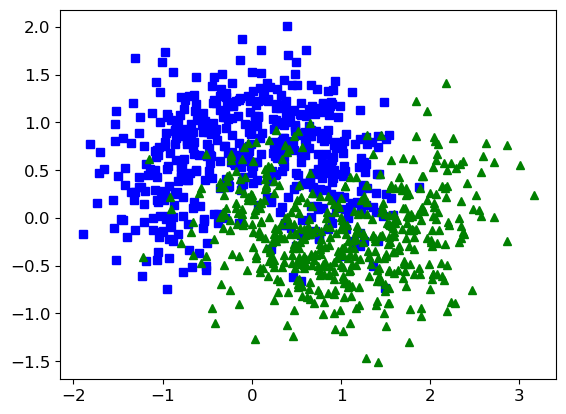

In [79]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

[LibSVM]0 0.1 0.3999183177947998
[LibSVM]1 0.01 0.38433241844177246
[LibSVM]2 0.001 0.4927351474761963
[LibSVM]3 0.0001 0.860079288482666
[LibSVM]4 1e-05 1.3297619819641113
[LibSVM]5 1.0000000000000002e-06 1.1854686737060547
[LibSVM]6 1.0000000000000002e-07 1.3021821975708008
[LibSVM]7 1.0000000000000002e-08 1.3262391090393066
[LibSVM]8 1.0000000000000003e-09 1.3077778816223145
[LibSVM]9 1.0000000000000003e-10 1.3664939403533936


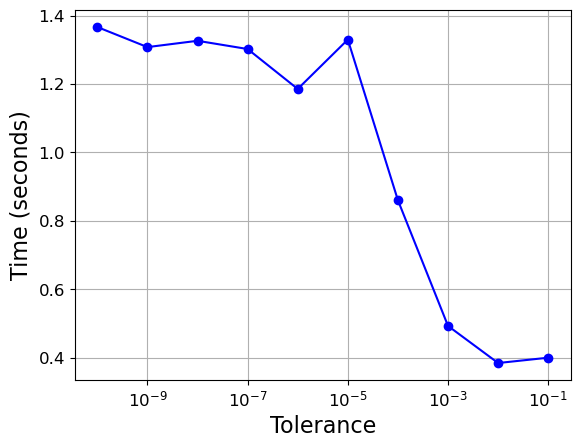

In [80]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

## **Training Time_rbf**

[LibSVM]0 0.1 0.02511906623840332
[LibSVM]1 0.01 0.04581165313720703
[LibSVM]2 0.001 0.03873181343078613
[LibSVM]3 0.0001 0.04223489761352539
[LibSVM]4 1e-05 0.046877145767211914
[LibSVM]5 1.0000000000000002e-06 0.05641913414001465
[LibSVM]6 1.0000000000000002e-07 0.07701826095581055
[LibSVM]7 1.0000000000000002e-08 0.08192133903503418
[LibSVM]8 1.0000000000000003e-09 0.10280275344848633
[LibSVM]9 1.0000000000000003e-10 0.10134482383728027


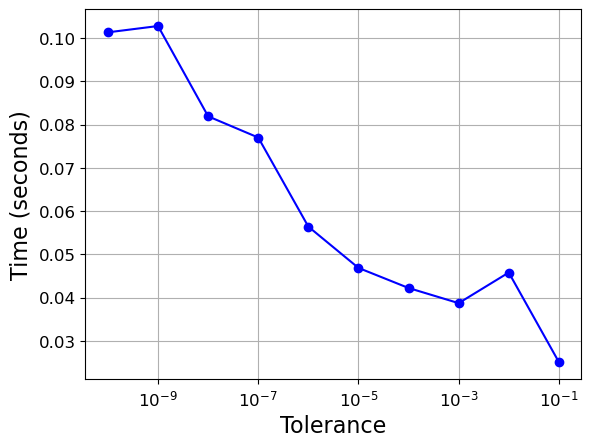

In [81]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="rbf", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

[LibSVM]0 0.1 0.031259775161743164
[LibSVM]1 0.01 0.044347524642944336
[LibSVM]2 0.001 0.02972888946533203
[LibSVM]3 0.0001 0.022572994232177734
[LibSVM]4 1e-05 0.0306856632232666
[LibSVM]5 1.0000000000000002e-06 0.031249284744262695
[LibSVM]6 1.0000000000000002e-07 0.031250953674316406
[LibSVM]7 1.0000000000000002e-08 0.02849125862121582
[LibSVM]8 1.0000000000000003e-09 0.03070807456970215
[LibSVM]9 1.0000000000000003e-10 0.028113365173339844


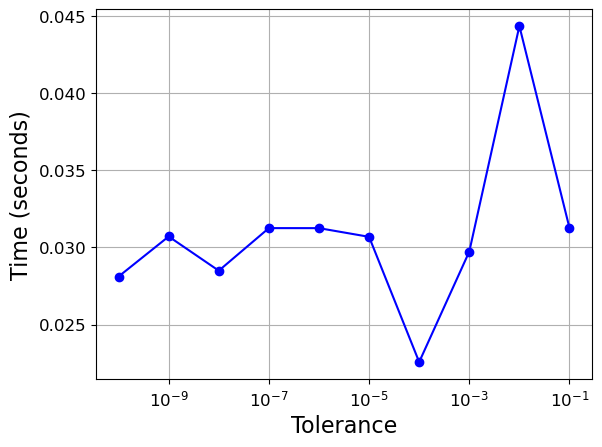

In [82]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="linear", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

## **Result and Analysis**

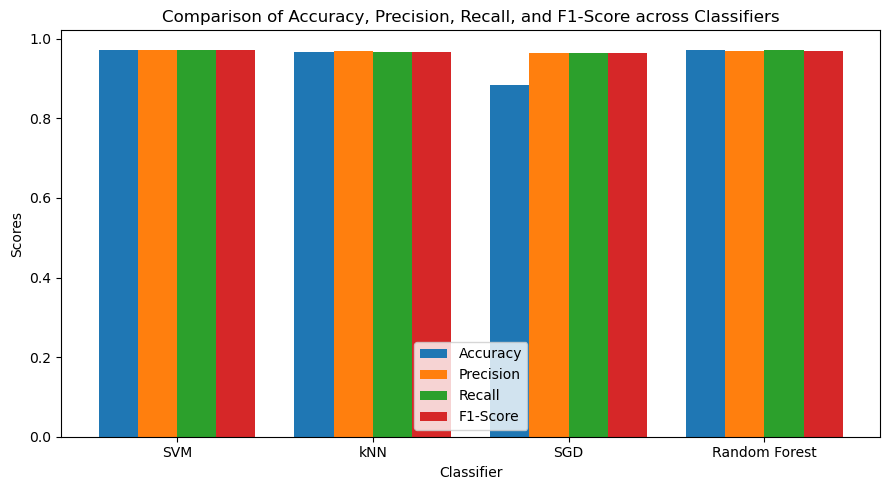

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
classifiers = ['SVM', 'kNN', 'SGD', 'Random Forest']
accuracy_scores = [0.9726, 0.968, 0.884, 0.971]
precision_scores = [0.9727, 0.969, 0.965, 0.970]
recall_scores = [0.9726, 0.968, 0.964, 0.971]
f1_scores = [0.9726, 0.968, 0.965, 0.970]

# Plotting
x = np.arange(len(classifiers))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(9, 5))

rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Classifier')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Precision, Recall, and F1-Score across Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

fig.tight_layout()

plt.show()


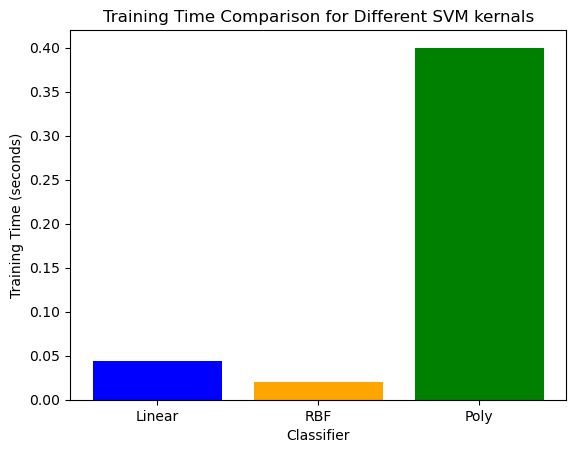

In [8]:
kernels = ['Linear', 'RBF', 'Poly']
training_times = [0.044, 0.02, 0.4]

plt.bar(kernels, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison for Different SVM kernals')
plt.show()
